# Color Space (Separating Colors under different lightings)
Sambhav Shrestha

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

### load and display the image

The dimension is: (600, 900, 3)


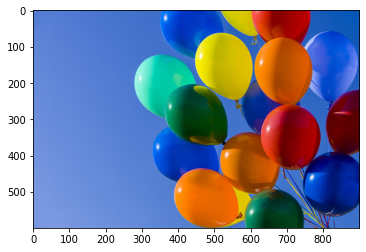

In [8]:
# load the image
image = cv2.imread("images/balloons.jpeg")
image_copy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#display the image
plt.imshow(image_copy)

#find the dimension of the image
print("The dimension is:", image_copy.shape)

### Orange color separation

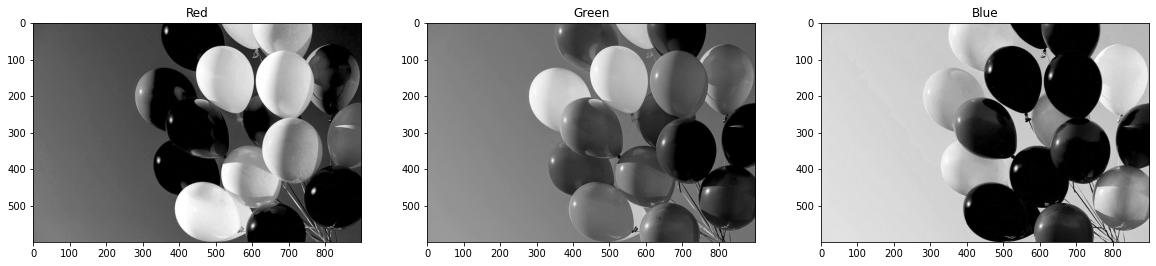

In [12]:
# compare the orange intensity in different channels
r = image_copy[:, :, 0]
g = image_copy[:, :, 1]
b = image_copy[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title("Red")
ax1.imshow(r, cmap="gray")

ax2.set_title("Green")
ax2.imshow(g, cmap="gray")

ax3.set_title("Blue")
ax3.imshow(b, cmap="gray")

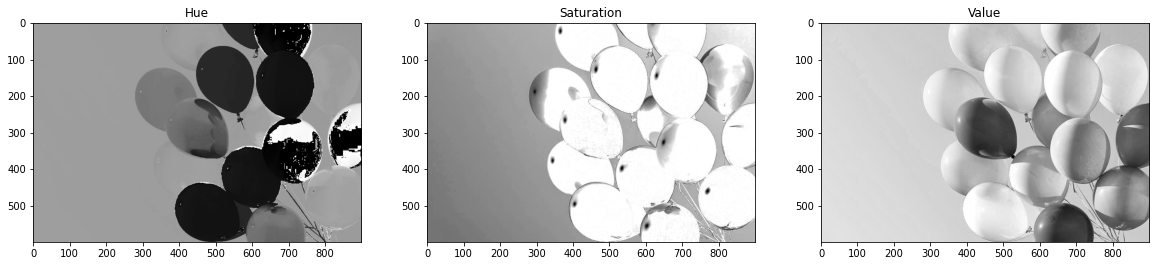

In [15]:
# compare the orange in HSV color space
image_hsv = cv2.cvtColor(image_copy, cv2.COLOR_RGB2HSV)

h = image_hsv[:, :, 0]
s = image_hsv[:, :, 1]
v = image_hsv[:, :, 2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 10))

ax1.set_title("Hue")
ax1.imshow(h, cmap="gray")

ax2.set_title("Saturation")
ax2.imshow(s, cmap="gray")

ax3.set_title("Value")
ax3.imshow(v, cmap="gray")

### Define color threshold and hue threshold

In [34]:
# get the lower and upper bound for orange color
rgb_lower = np.array([200, 20, 0])
rgb_upper = np.array([255, 240, 200])

In [32]:
# get the lower and upper bound for hue
hsv_lower = np.array([10, 100, 0])
hsv_upper = np.array([20, 255, 255])

### mask the image

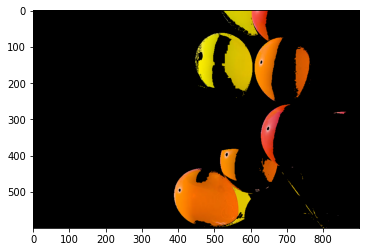

In [35]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image_copy, rgb_lower, rgb_upper)

# mask the image
masked_image = np.copy(image_copy)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

Here, the RGB color space was not able to separate orange completely under different lightings.

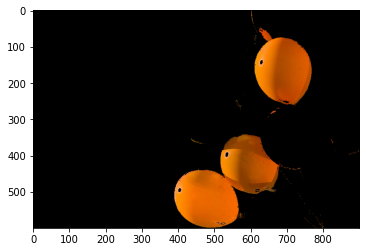

In [37]:
# Define the masked area in HSV space
mask_hsv = cv2.inRange(image_hsv, hsv_lower, hsv_upper)

# mask the image
masked_image = np.copy(image_copy)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)

Hence, HSV color space was able to separate orange balloons from the rest 